# Loan Dataset Analysis

In this dataset we have been provided with the loan dataset which consists can be used by a service based company to classify loans for the user into good or bad loan on the basis of their financial details like income, dti, housing, loan amount etc. 
Also the service can compare various loan provided throughout the internet and provide the user which loan is most suitable to them.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

## Splitting dataset

In [3]:
X = df.drop('loan_condition_cat', axis = 1)
y = df['loan_condition_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(702545, 29) (702545,) (346030, 29) (346030,)


In [5]:
X_train.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
664918,56141154,2015,01-08-2015,1012016,2.0,RENT,1,Low,50000,1,...,Good Loan,14.65,C,3,18.03,1227.87,584.01,0.0,236.07,munster
741964,49913656,2015,01-05-2015,1012016,4.0,MORTGAGE,3,Low,31000,1,...,Good Loan,16.99,D,4,23.85,1696.66,1071.34,0.0,243.30,leinster
314050,25186921,2014,01-09-2014,1012016,10.0,MORTGAGE,3,Low,100000,1,...,Good Loan,8.39,A,1,22.48,9107.59,7445.93,0.0,567.30,munster
631759,58713094,2015,01-08-2015,1012016,10.0,MORTGAGE,3,Low,29000,1,...,Good Loan,9.17,B,2,22.85,1747.75,1353.59,0.0,350.67,munster
555223,63506625,2015,01-10-2015,1122015,10.0,RENT,1,Low,42000,1,...,Good Loan,11.53,B,2,13.60,194.12,140.98,0.0,98.98,Northern-Irl


In [6]:
X_train.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,7.025450e+05,702545.000000,7.025450e+05,702545.000000,702545.000000,7.025450e+05,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000,702545.000000
mean,2.752005e+07,2013.097861,1.049838e+06,5.843621,2.086802,7.358811e+04,1.321996,14046.173946,1.254479,1.000491,5.227392,1.470808,13.310171,2.974590,17.572904,8373.168802,5967.869134,206.477546,428.147856
std,2.399790e+07,2.461240,4.462111e+04,3.582316,0.926346,6.195888e+04,0.595746,8308.520270,0.435568,0.022155,2.777500,0.499147,4.214209,1.482618,18.895481,8010.385618,6432.045913,772.230635,238.695009
min,5.473400e+04,2007.000000,1.012008e+06,-1.552942,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,5.320000,1.000000,-7.950813,-2758.175656,-6639.724478,-3626.590895,-236.893736
25%,3.067144e+06,2013.000000,1.012016e+06,2.000000,1.000000,4.400000e+04,1.000000,8000.000000,1.000000,1.000000,4.000000,1.000000,10.160000,2.000000,11.220000,2308.710000,1349.460000,0.000000,255.330000
50%,2.230482e+07,2014.000000,1.022010e+06,6.000000,2.000000,6.240000e+04,1.000000,12000.000000,1.000000,1.000000,6.000000,1.000000,12.990000,3.000000,17.190000,5929.260000,3729.050000,0.000000,379.360000
75%,5.058007e+07,2015.000000,1.092015e+06,10.000000,3.000000,8.900000e+04,2.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,16.118916,4.000000,23.470000,11976.460000,8493.870000,0.000000,563.230000
max,6.861706e+07,2015.000000,1.122015e+06,12.921874,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,31900.520000,1445.460000


In [7]:
X_train.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [8]:
X_test.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [9]:
X_train.nunique()

id                      594820
year                         9
issue_d                    103
final_d                     97
emp_length_int          107803
home_ownership               6
home_ownership_cat           6
income_category              3
annual_inc               35011
income_cat                   3
loan_amount               1369
term                         2
term_cat                     2
application_type             2
application_type_cat         2
purpose                     14
purpose_cat                 14
interest_payments            2
interest_payment_cat         2
loan_condition               2
interest_rate           108257
grade                        7
grade_cat                    7
dti                     111840
total_pymnt             472584
total_rec_prncp         303407
recoveries              123427
installment             168618
region                       5
dtype: int64

In [10]:
for i in X_train.columns:
    print(df[i].value_counts(),'\n')

260368      797
252185      769
253002      738
239843      738
254223      737
           ... 
27652392      1
28382880      1
28744149      1
28923683      1
36271262      1
Name: id, Length: 887379, dtype: int64 

2015    421094
2014    235628
2008    163589
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2007       603
Name: year, dtype: int64 

01-02-2008    161502
01-10-2015     48631
01-07-2015     45962
01-12-2015     44342
01-10-2014     38782
               ...  
01-08-2007        74
01-07-2007        63
01-09-2008        57
01-09-2007        53
01-06-2007        24
Name: issue_d, Length: 103, dtype: int64 

1012016    491650
1122015    150861
1102015     16000
1072015     14483
1112015     13981
            ...  
1102010       292
1072009        72
1012008        11
1022008         8
1122007         2
Name: final_d, Length: 98, dtype: int64 

10.000000    291569
2.000000      78870
0.500000      70605
3.000000      70026
1.000000      57095
       

## Basic Data Cleaning and Feature Engineering

In [11]:
X_train['issue_d']= X_train['issue_d'].astype('datetime64')
X_train['final_d'] = X_train['final_d'].astype('object')
X_train['final_d'] = X_train['final_d'].apply(lambda x: '0'+str(x))
X_train['final_d'] = X_train['final_d'].apply(lambda x: str(x[0:2])+'/'+str(x[2:4])+'/'+str(x[4:]))
X_train['final_d'] = X_train['final_d'].astype('datetime64')


X_test['issue_d']= X_test['issue_d'].astype('datetime64')
X_test['final_d'] = X_test['final_d'].astype('object')
X_test['final_d'] = X_test['final_d'].apply(lambda x: '0'+str(x))
X_test['final_d'] = X_test['final_d'].apply(lambda x: str(x[0:2])+'/'+str(x[2:4])+'/'+str(x[4:]))
X_test['final_d'] = X_test['final_d'].astype('datetime64')


In [12]:
X_train['term'] = X_train['term'].apply(lambda x: x.split()[0])
X_test['term'] = X_test['term'].apply(lambda x: x.split()[0])

In [13]:
X_train['term']= X_train['term'].astype('int64')
X_test['term'] = X_test['term'].astype('int64')

In [14]:
count1, count2, count3, count4, count5 = 0,0,0,0,0
for i in X_train['interest_rate']:
#     print(i)
    if (i>=5.32) & (i<10.0):
        count1 += 1
    elif (i>=10.0) & (i<15.0):
        count2 +=1
    elif (i>=15.0) & (i<20.0):
        count3+= 1
    elif (i>=20.0) & (i<25.0):
        count4 += 1
    else:
        count5 +=1
        
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
        
        

168007
313558
178556
38111
4313


In [15]:
cat_col = []
num_col = []
date_time = []

for i in X_train.columns:
    if X_train[i].dtype =="object":
        cat_col.append(i)
    elif X_train[i].dtype=="datetime64[ns]":
        date_time.append(i)
    else:
        num_col.append(i)

print(cat_col, len(cat_col))
print(num_col, len(num_col))
print(date_time, len(date_time))

['home_ownership', 'income_category', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'region'] 8
['id', 'year', 'emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'interest_rate', 'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment'] 19
['issue_d', 'final_d'] 2


In [16]:
X_train.join(y_train).corr()['loan_condition_cat']

id                     -0.321600
year                   -0.426755
emp_length_int         -0.067739
home_ownership_cat     -0.041838
annual_inc             -0.047547
income_cat              0.188365
loan_amount            -0.083867
term                   -0.077703
term_cat               -0.077703
application_type_cat   -0.008104
purpose_cat             0.142323
interest_payment_cat    0.082236
interest_rate           0.133282
grade_cat               0.203000
dti                    -0.025154
total_pymnt             0.073255
total_rec_prncp        -0.032158
recoveries              0.341648
installment            -0.026589
loan_condition_cat      1.000000
Name: loan_condition_cat, dtype: float64

## Visualization 

<AxesSubplot:>

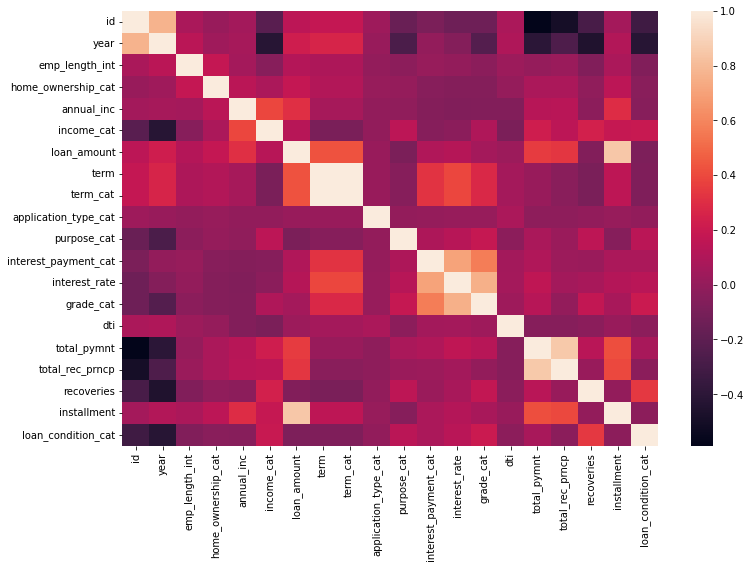

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(X_train.join(y_train).corr())

<BarContainer object of 3 artists>

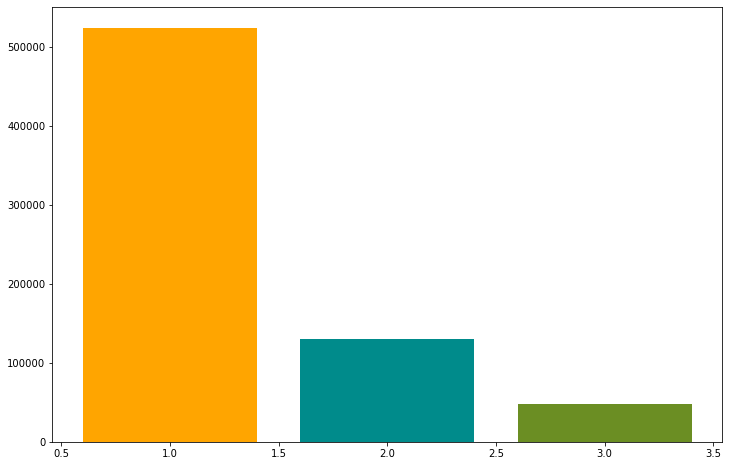

In [18]:
plt.figure(figsize = (12,8))
plt.bar(X_train['income_cat'].value_counts().index, X_train['income_cat'].value_counts(), color= ['orange', 'darkcyan', 'olivedrab'])

<BarContainer object of 2 artists>

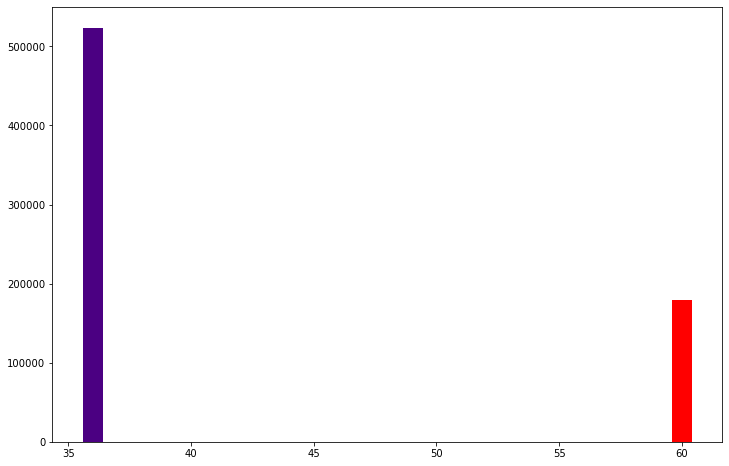

In [19]:
plt.figure(figsize = (12,8))
plt.bar(X_train['term'].value_counts().index,X_train['term'].value_counts(), color = ['indigo','red'])

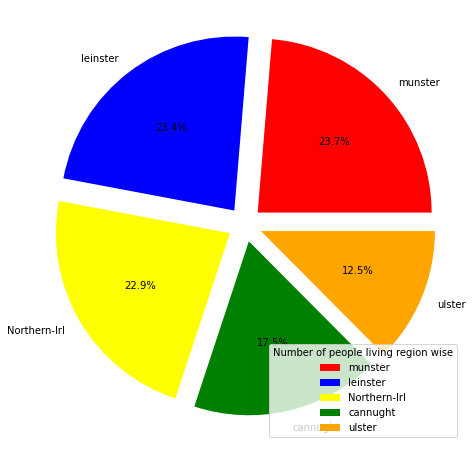

In [20]:
region_name = ['munster','leinster','cannught','ulster',"Northern-Irl"]
plt.figure(figsize = (12,8))
plt.pie(X_train['region'].value_counts(),colors = ['red', 'blue', 'yellow', 'green', 'orange'],explode = [0.1,0.1,0.1,0.1,0.1],labels = X_train['region'].unique(),autopct = '%1.1f%%')
plt.legend(title = 'Number of people living region wise',loc = 4)

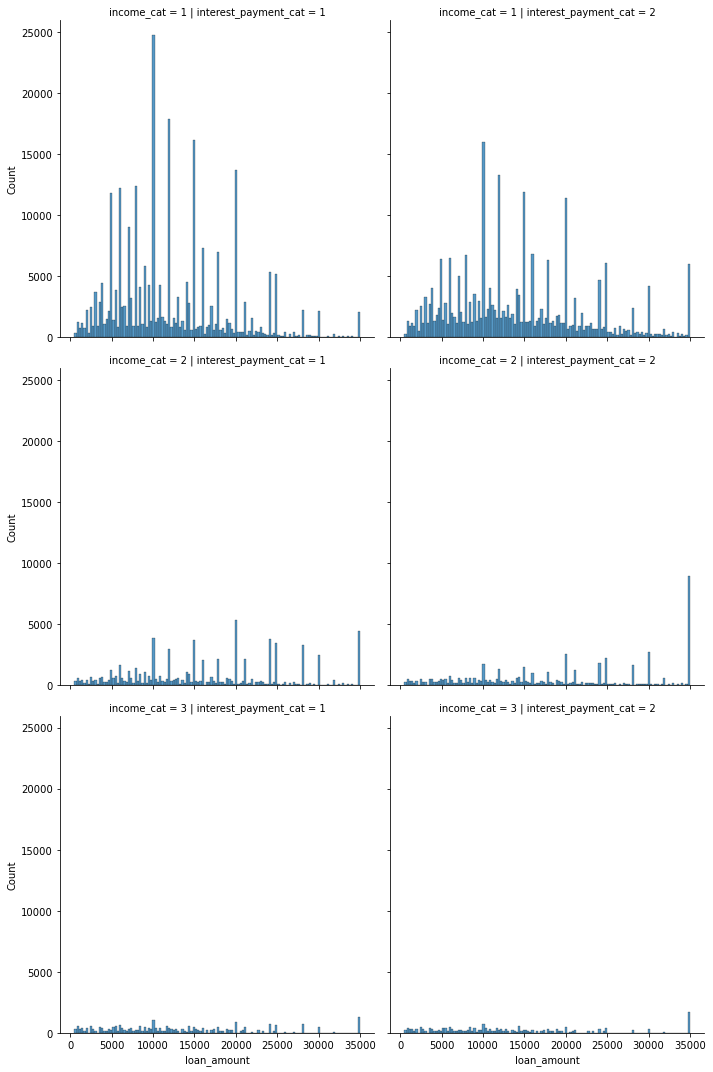

In [21]:
sns.displot(X_train, x = 'loan_amount',col = 'interest_payment_cat', row = 'income_cat')

(0.0, 5.0)

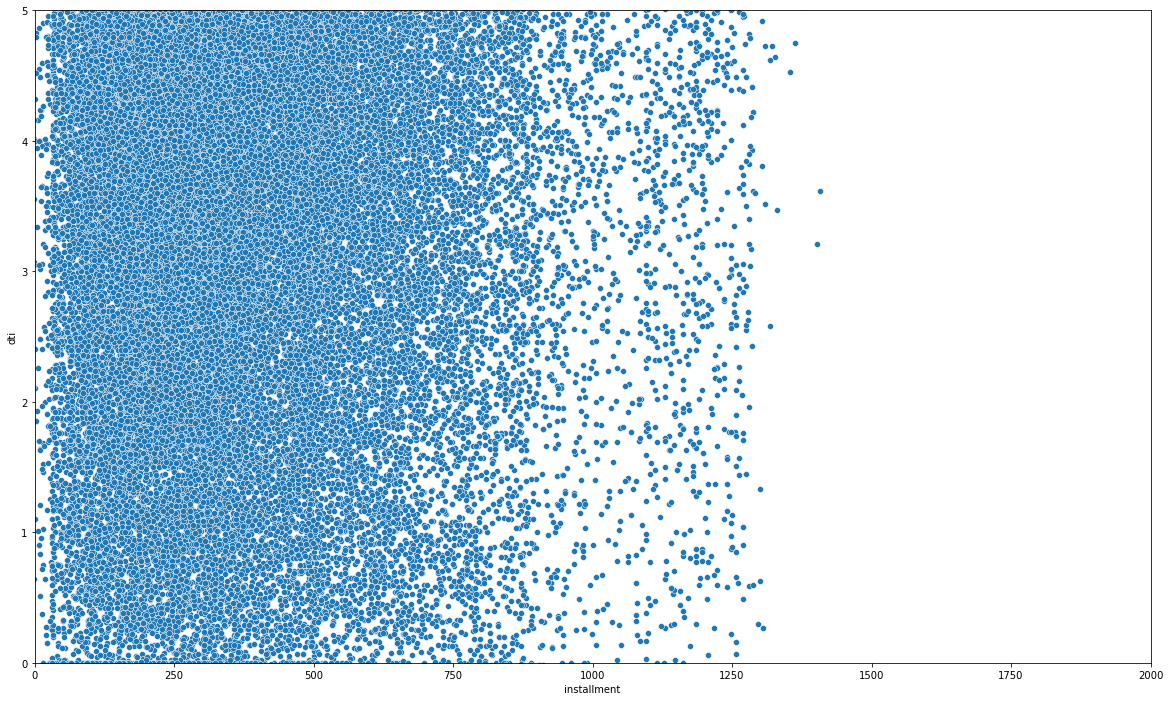

In [22]:
plt.figure(figsize = (20,12))
sns.scatterplot(data=X_train, x="installment", y="dti",)
plt.xlim(0,2000)
plt.ylim(0,5)

<AxesSubplot:xlabel='purpose', ylabel='loan_amount'>

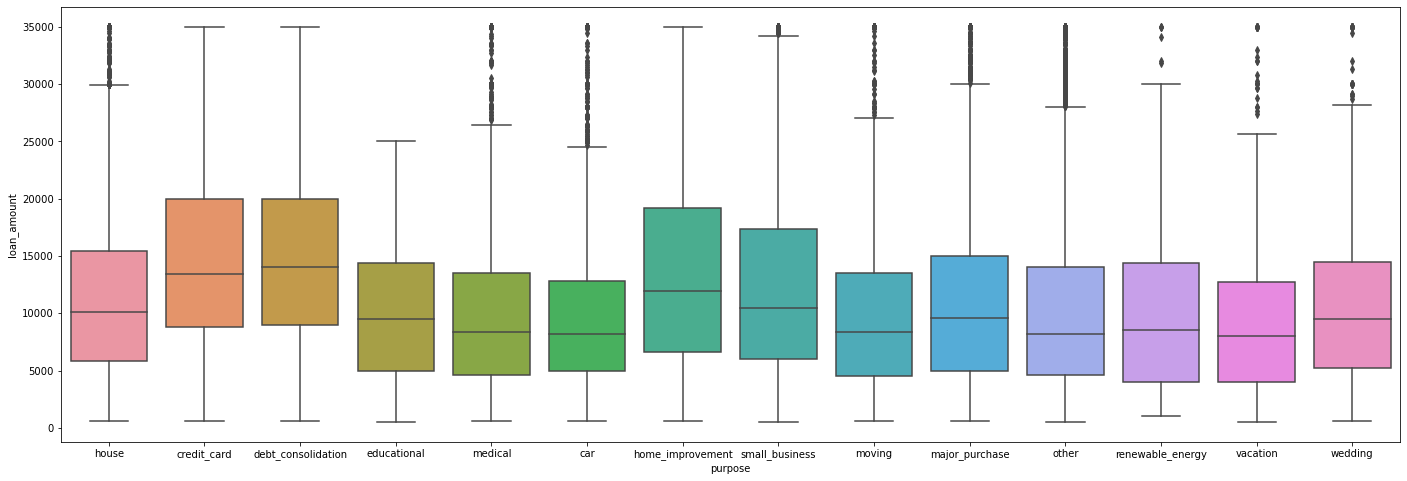

In [23]:
plt.figure(figsize = (24,8))
sns.boxplot(data = X_train,x = 'purpose', y = 'loan_amount')

<AxesSubplot:xlabel='region', ylabel='annual_inc'>

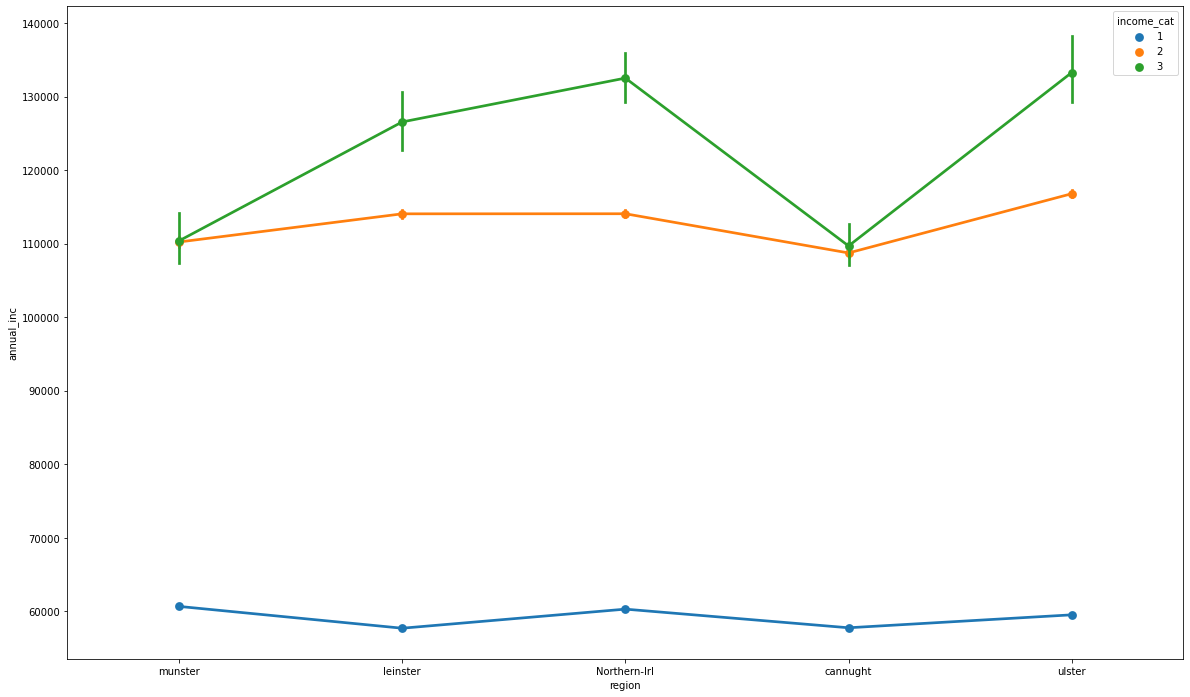

In [24]:
plt.figure(figsize = (20,12))
sns.pointplot(data = X_train, x='region',y='annual_inc',hue = 'income_cat')


## Dropping Categorical Columns

In [25]:
X_train.drop(['home_ownership', 'income_category', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade','issue_d','final_d'], axis = 1, inplace = True)
X_test.drop(['home_ownership', 'income_category', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade','issue_d','final_d'], axis = 1, inplace = True)

## Conversion from categorical to numeral column (One Hot Encoding)

In [26]:
region_df_train = pd.get_dummies(X_train[['region']])
region_df_test = pd.get_dummies(X_test[['region']])

region_df_train.columns = X_train['region'].unique()
region_df_test.columns = X_test['region'].unique()

X_train = X_train.join(region_df_train,on=X_train.index)
X_test = X_test.join(region_df_test, on=X_test.index)

In [27]:
X_train.drop('region', axis = 1, inplace = True)
X_test.drop('region', axis = 1, inplace = True)

## Training of models

In [28]:
scores = {}

In [29]:
log_reg = LogisticRegression(max_iter = 1000000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [30]:
scores['Logistic Regression']=log_reg.score(X_test, y_test)

In [31]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
scores['Random Forest Classifier'] =  random_forest.score(X_test,y_test)

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores['GaussianNB'] = gnb.score(X_test,y_test)

In [33]:
model = Sequential()
model.add(Dense(100, activation = 'relu',input_shape=(24,)))
model.add(Dense(80,activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
opt = keras.optimizers.Adam(learning_rate=0.9)
model.compile(optimizer=opt, 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])
with tf.device('/gpu:0'):
    model.fit(X_train,y_train, epochs = 10)

Epoch 1/10
21955/21955 [==============================] - 142s 6ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 2/10
21955/21955 [==============================] - 76s 3ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 3/10
21955/21955 [==============================] - 46s 2ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 4/10
21955/21955 [==============================] - 46s 2ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 5/10
21955/21955 [==============================] - 46s 2ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 6/10
21955/21955 [==============================] - 46s 2ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 7/10
21955/21955 [==============================] - 51s 2ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 8/10
21955/21955 [==============================] - 61s 3ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 9/10
21955/21955 [==============================] - 55s 3ms/step - loss: 0.1375 - accuracy: 0.8625
Epoch 10/10
21955/21955 [=============================

In [35]:
score, acc = model.evaluate(X_test, y_test)
scores['Neural Network'] = acc

10814/10814 [==============================] - 17s 2ms/step - loss: 0.1397 - accuracy: 0.8603


## Plotting Graph across scores

Text(0.5, 0, "dict_keys(['Logistic Regression', 'Random Forest Classifier', 'GaussianNB', 'Neural Network'])")

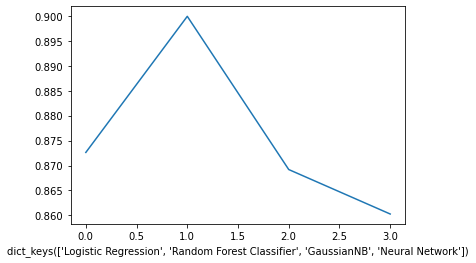

In [40]:
plt.plot(scores.values())
plt.xlabel(scores.keys())